# Keras
- High-Level Deep Learning Framework
- Multiple Backends: Tensorflow, Theano, CNTK

In [48]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import TensorBoard
import tensorflowjs as tfjs
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.models import load_model

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

# Load and preprocess data

In [33]:
# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784)
60000 train samples
10000 test samples


# Define model

![title](images/mnist_two_layers.png)

In [34]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.5),
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None


# Train Model

In [41]:
batch_size = 128
epochs = 2
model_path = "simple_mnist.hdf5"

tensorboard_callback = TensorBoard(log_dir="log", histogram_freq=0,
                                   write_graph=False, write_images=False)
checkpoint_callback = ModelCheckpoint(filepath=model_path,
                                      monitor="val_acc", verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback, checkpoint_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s 11us/step - loss: 0.2690 - acc: 0.9227 - val_loss: 0.3956 - val_acc: 0.8814

Epoch 00001: val_acc improved from -inf to 0.88140, saving model to simple_mnist.hdf5
Epoch 2/2
60000/60000 [==============================] - 1s 11us/step - loss: 0.2554 - acc: 0.9260 - val_loss: 0.2484 - val_acc: 0.9291

Epoch 00002: val_acc improved from 0.88140 to 0.92910, saving model to simple_mnist.hdf5


# Validate Model

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.27974302403628826
Validation accuracy: 0.9189


# Load model

In [59]:
model = load_model(model_path)

# Predict an image

(28, 28)


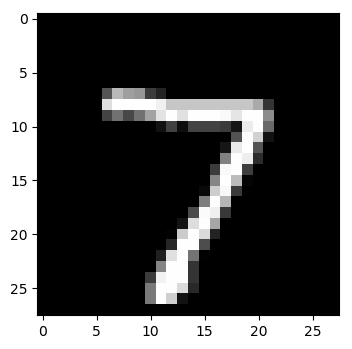

In [53]:
x = x_test[0]
img = x.reshape([28, 28])
print(img.shape)

plt.imshow(img, cmap="gray")

In [58]:
x = x_test[0]
x = np.expand_dims(x, axis=0)

print(x.shape)
predictions = model.predict(x)[0]
prediction = np.argmax(predictions)
print(prediction)

(1, 784)
7
